        M1_FPKM   M2_FPKM   M3_FPKM   M4_FPKM   M5_FPKM   M6_FPKM   M7_FPKM  \
0     -0.040567 -0.055049 -0.062027 -0.049759 -0.063603 -0.019517 -0.101752   
1     -0.040148 -0.049473 -0.055884 -0.046160 -0.063143 -0.016874 -0.063963   
2     -0.040819 -0.057524 -0.065718 -0.051027 -0.064110 -0.020954 -0.114288   
3     -0.040390 -0.049910 -0.054167 -0.046229 -0.063198 -0.015801 -0.062042   
4     -0.040860 -0.048146 -0.044963 -0.046240 -0.064148 -0.010130 -0.000398   
...         ...       ...       ...       ...       ...       ...       ...   
33937 -0.040563 -0.055868 -0.063822 -0.051235 -0.061317 -0.020451 -0.112621   
33938 -0.040273 -0.055022 -0.058007 -0.050560 -0.058250 -0.016666 -0.111507   
33939 -0.039547 -0.054437 -0.059728 -0.050406 -0.041443 -0.014439 -0.112355   
33940 -0.040285 -0.057063 -0.064829 -0.050637 -0.060026 -0.018968 -0.111342   
33941 -0.040860 -0.058134 -0.066368 -0.051235 -0.045705 -0.021345 -0.115241   

        M8_FPKM  
0     -0.014694  
1     -0.012877

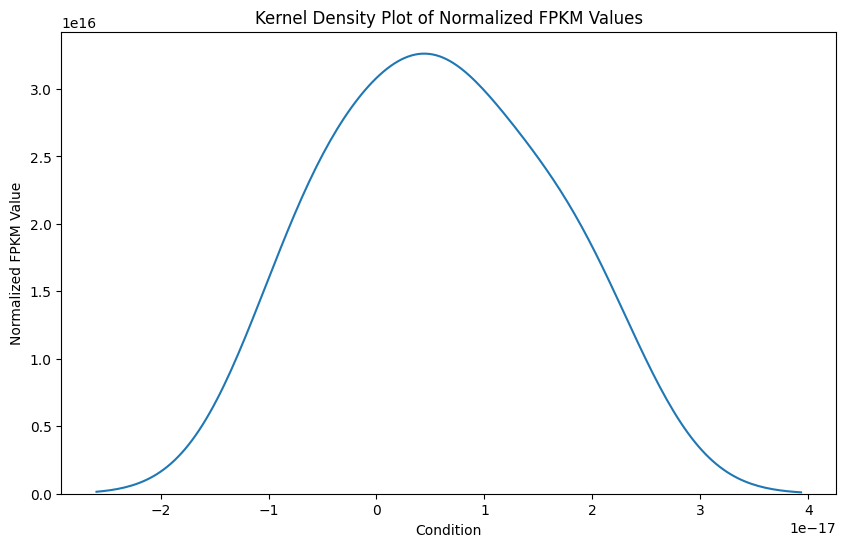

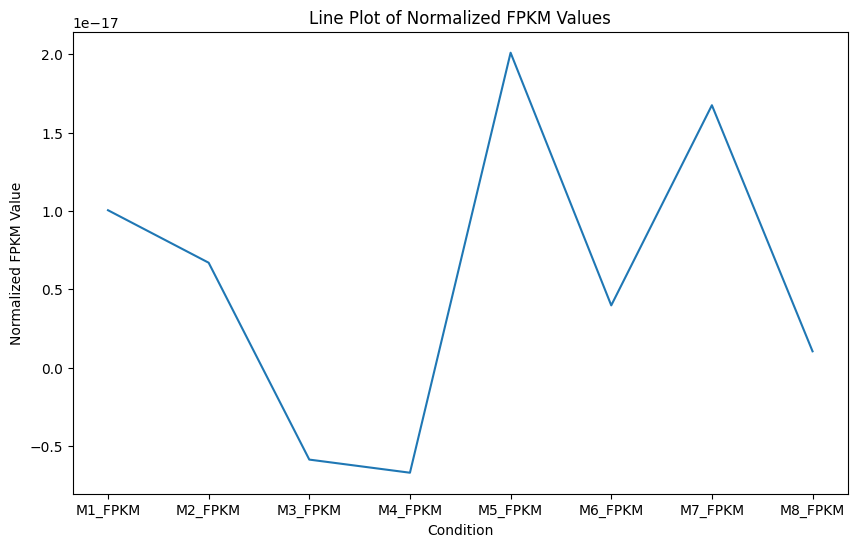

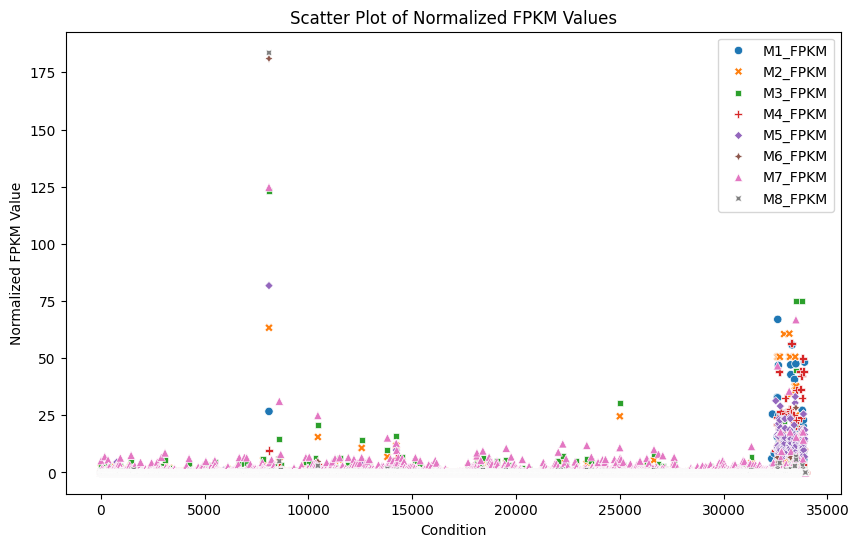

<Figure size 1200x800 with 0 Axes>

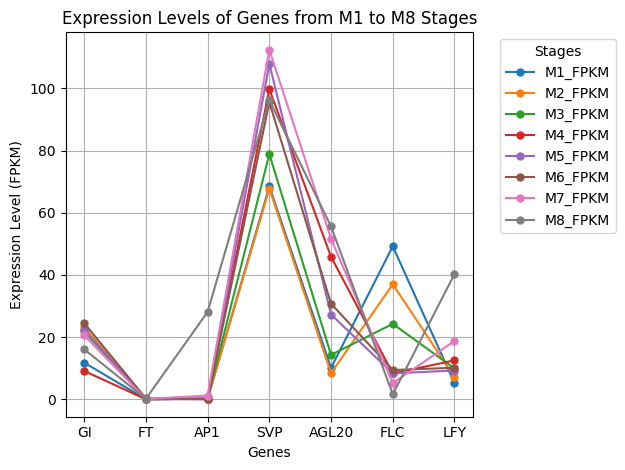

<Figure size 1200x800 with 0 Axes>

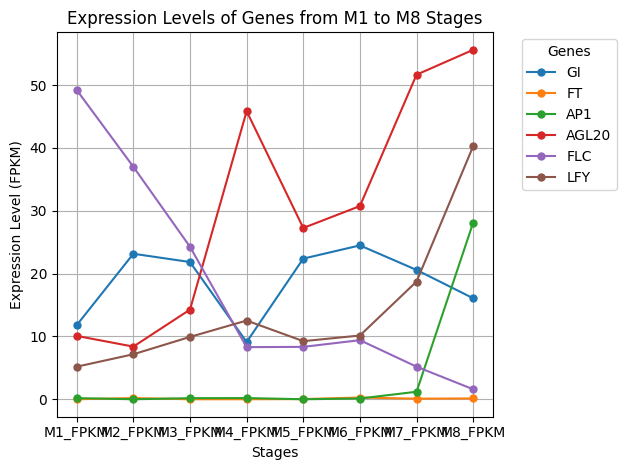

In [6]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/genes.fpkm_tracking", sep="\t")

# Select gene IDs and FPKM values for M1-M8 conditions
genes = data["gene_id"]
fpkm_data = data[['M1_FPKM', 'M2_FPKM', 'M3_FPKM', 'M4_FPKM', 'M5_FPKM', 'M6_FPKM', 'M7_FPKM', 'M8_FPKM']]
imputer = SimpleImputer(strategy="median")
# Fit and transform the data using SimpleImputer
fpkm_data_imputed = imputer.fit_transform(fpkm_data)
# Normalize the FPKM values using StandardScaler
scaler = StandardScaler()
fpkm_data_normalized = scaler.fit_transform(fpkm_data_imputed)

# Convert the normalized values back to a DataFrame
fpkm_data_normalized_df = pd.DataFrame(fpkm_data_normalized, columns=fpkm_data.columns)

#pirnt
print(fpkm_data_normalized_df)

# Convert the normalized values back to a DataFrame
fpkm_data_normalized_df = pd.DataFrame(fpkm_data_normalized, columns=fpkm_data.columns)
# Calculate the mean FPKM value for each sample
mean_fpkm = fpkm_data_normalized_df.mean()

# Print the mean FPKM values for each sample
print(mean_fpkm)

##Klepikova data reporducibility

plt.figure(figsize=(10, 6))
sns.kdeplot(data=mean_fpkm)
plt.title('Kernel Density Plot of Normalized FPKM Values')
plt.xlabel('Condition')
plt.ylabel('Normalized FPKM Value')
plt.show

plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_fpkm)
plt.title('Line Plot of Normalized FPKM Values')
plt.xlabel('Condition')
plt.ylabel('Normalized FPKM Value')
plt.show


plt.figure(figsize=(10, 6))
sns.scatterplot(data=fpkm_data_normalized_df)
plt.title('Scatter Plot of Normalized FPKM Values')
plt.xlabel('Condition')
plt.ylabel('Normalized FPKM Value')
plt.show

genes_of_interest = ["AT5G10140", "AT1G69120", "AT1G22770", "AT2G45660", "AT2G22540", "AT1G65480", "AT5G61850"]
# Filter the dataset for the FPKM values of the genes of interest from M1 to M8 stages
fpkm_data = data.loc[data["gene_id"].isin(genes_of_interest), ["gene_short_name", 'M1_FPKM', 'M2_FPKM', 'M3_FPKM', 'M4_FPKM', 'M5_FPKM', 'M6_FPKM', 'M7_FPKM', 'M8_FPKM']]
# Set the gene_short_name column as the index
fpkm_data.set_index("gene_short_name", inplace=True)
# Transpose the dataframe to have genes as rows and stages as columns

# Plot the expression levels of the genes over the different stages
plt.figure(figsize=(12, 8))
fpkm_data.plot(marker='o', markersize=5)
plt.title("Expression Levels of Genes from M1 to M8 Stages")
plt.xlabel("Genes")
plt.ylabel("Expression Level (FPKM)")
plt.xticks(range(len(fpkm_data.index)), fpkm_data.index)
plt.legend(title="Stages", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
#plt.savefig("Klepikova data reproducibility2.png")
plt.show()



import matplotlib.pyplot as plt

genes_of_interest = ["AT5G10140", "AT1G69120", "AT1G22770", "AT2G45660", "AT1G65480", "AT5G61850"]

# Assuming 'data' is a DataFrame that contains your dataset
# Filter the dataset for the FPKM values of the genes of interest from M1 to M8 stages
fpkm_data = data.loc[data["gene_id"].isin(genes_of_interest), ["gene_short_name", 'M1_FPKM', 'M2_FPKM', 'M3_FPKM', 'M4_FPKM', 'M5_FPKM', 'M6_FPKM', 'M7_FPKM', 'M8_FPKM']]

# Set the gene_short_name column as the index
fpkm_data.set_index("gene_short_name", inplace=True)

# Transpose the dataframe to have stages as rows and genes as columns
fpkm_data = fpkm_data.T

# Plot the expression levels of the genes over the different stages
plt.figure(figsize=(12, 8))
fpkm_data.plot(marker='o', markersize=5)
plt.title("Expression Levels of Genes from M1 to M8 Stages")
plt.xlabel("Stages")
plt.ylabel("Expression Level (FPKM)")
plt.xticks(range(len(fpkm_data.index)), fpkm_data.index)
plt.legend(title="Genes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
#plt.savefig("Expression of flowering promoting genes in Klepikova dataset.png")
plt.show()